##### Data Ingestion

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Documents\DataAnalysis\1py-master\py-master\ML\13_kmeans\income.csv")

In [4]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


##### Data Visualization

In [6]:
import matplotlib.pyplot as plt

In [7]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

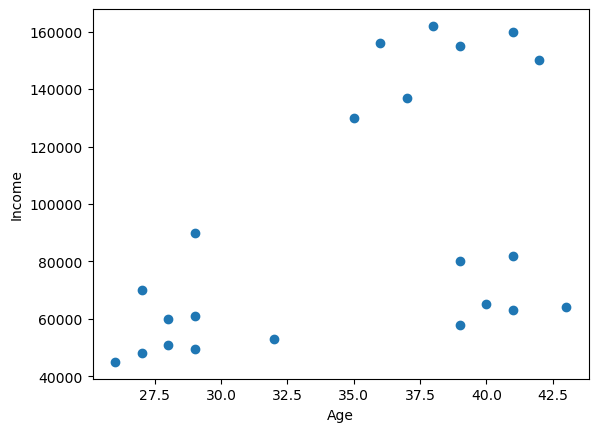

In [8]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df['Age'] , df['Income($)'])

##### We decide there are 3 clusters in the data after visualization

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=3)

In [12]:
y_pred = model.fit_predict(df[['Age' , 'Income($)']])
y_pred

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [13]:
df['Clusters'] = y_pred

In [14]:
df

,Name,Age,Income($),Clusters
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [15]:
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

##### Create seperate dataframe for each clusters

In [17]:
df0 = df[df['Clusters'] == 0]

In [18]:
df0.head()

,Name,Age,Income($),Clusters
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0


In [19]:
df1 = df[df['Clusters'] == 1]

In [20]:
df1.head()

,Name,Age,Income($),Clusters
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [21]:
df2 = df[df['Clusters'] == 2]

In [22]:
df2.head()

,Name,Age,Income($),Clusters
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2


##### Create a scatter plot to visualise the clusters along with their centroids

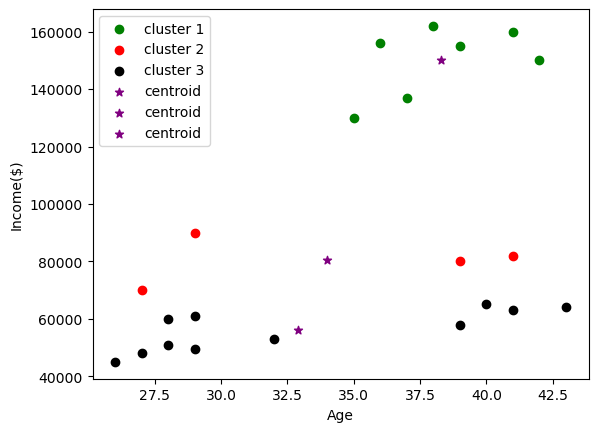

In [24]:
plt.scatter(df0['Age'] , df0['Income($)'], color = 'green', label = 'cluster 1')
plt.scatter(df1['Age'] , df1['Income($)'], color = 'red', label = 'cluster 2')
plt.scatter(df2['Age'] , df2['Income($)'], color = 'black', label = 'cluster 3')
plt.scatter(model.cluster_centers_[0][0],model.cluster_centers_[0][1], color = 'purple', marker = '*', label = 'centroid')
plt.scatter(model.cluster_centers_[1][0],model.cluster_centers_[1][1], color = 'purple', marker = '*', label = 'centroid')
plt.scatter(model.cluster_centers_[2][0],model.cluster_centers_[2][1], color = 'purple', marker = '*' , label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [25]:
model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [26]:
model.cluster_centers_[0][0]

38.285714285714285

In [27]:
model.cluster_centers_[0][1]

150000.0

##### Preprocessing the dataframe with standard scalar

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
df['Scaled Age'] = scaler.fit_transform(df[['Age']])

In [32]:
df['Scaled Income'] = scaler.fit_transform(df[['Income($)']])

In [33]:
df

,Name,Age,Income($),Clusters,Scaled Age,Scaled Income
0,Rob,27,70000,1,-1.356055,-0.480684
1,Michael,29,90000,1,-1.009157,-0.010159
2,Mohan,29,61000,2,-1.009157,-0.692421
3,Ismail,28,60000,2,-1.182606,-0.715947
4,Kory,42,150000,0,1.245679,1.401417
5,Gautam,39,155000,0,0.725332,1.519048
6,David,41,160000,0,1.072230,1.636679
7,Andrea,38,162000,0,0.551883,1.683732
8,Brad,36,156000,0,0.204985,1.542574
9,Angelina,35,130000,0,0.031536,0.930891


In [34]:
model_1 = KMeans(n_clusters=3)

In [35]:
y_pred_1 = model_1.fit_predict(df[['Scaled Age' , 'Scaled Income']])
y_pred_1

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [36]:
df['Clusters_scaled'] = y_pred_1

In [37]:
df

,Name,Age,Income($),Clusters,Scaled Age,Scaled Income,Clusters_scaled
0,Rob,27,70000,1,-1.356055,-0.480684,1
1,Michael,29,90000,1,-1.009157,-0.010159,1
2,Mohan,29,61000,2,-1.009157,-0.692421,1
3,Ismail,28,60000,2,-1.182606,-0.715947,1
4,Kory,42,150000,0,1.245679,1.401417,0
5,Gautam,39,155000,0,0.725332,1.519048,0
6,David,41,160000,0,1.072230,1.636679,0
7,Andrea,38,162000,0,0.551883,1.683732,0
8,Brad,36,156000,0,0.204985,1.542574,0
9,Angelina,35,130000,0,0.031536,0.930891,0


In [38]:
model_1.cluster_centers_

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

In [39]:
df0 = df[df['Clusters_scaled'] == 0]
df1 = df[df['Clusters_scaled'] == 1]
df2 = df[df['Clusters_scaled'] == 2]

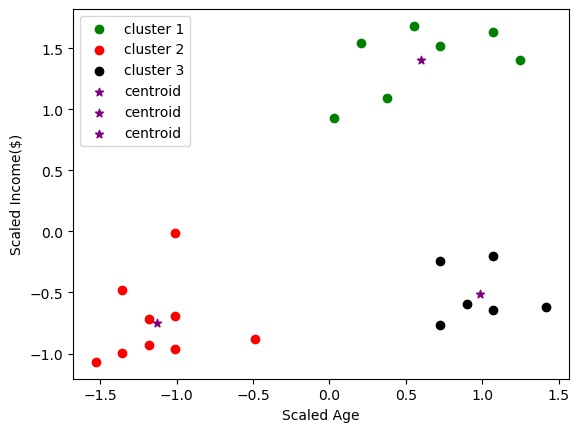

In [40]:
plt.scatter(df0['Scaled Age'] , df0['Scaled Income'], color = 'green', label = 'cluster 1')
plt.scatter(df1['Scaled Age'] , df1['Scaled Income'], color = 'red', label = 'cluster 2')
plt.scatter(df2['Scaled Age'] , df2['Scaled Income'], color = 'black', label = 'cluster 3')
plt.scatter(model_1.cluster_centers_[0][0],model_1.cluster_centers_[0][1], color = 'purple', marker = '*', label = 'centroid')
plt.scatter(model_1.cluster_centers_[1][0],model_1.cluster_centers_[1][1], color = 'purple', marker = '*', label = 'centroid')
plt.scatter(model_1.cluster_centers_[2][0],model_1.cluster_centers_[2][1], color = 'purple', marker = '*' , label = 'centroid')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income($)')
plt.legend()

In [41]:
model_1.inertia_

3.889308657130143

##### Elbow Plot

In [86]:
len(df)

22

In [96]:
sse = []
k_rng = range(1,11)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Scaled Age' , 'Scaled Income']])
    sse.append(km.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [98]:
sse

[43.99999999999999,
 16.194890274706772,
 3.889308657130143,
 2.828763380093525,
 2.1690542993949644,
 1.8323705528551364,
 1.6614518802906,
 1.2437749657973713,
 0.8683403761475859,
 0.9188356872141878]

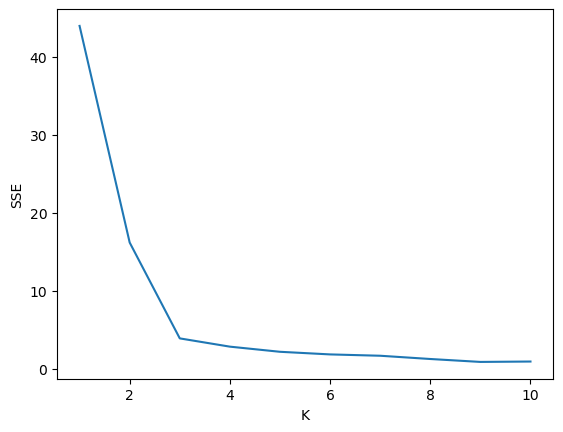

In [100]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng , sse)